<a href="https://colab.research.google.com/github/kotharisanjana/CMPE255_DataMining_Fall2022/blob/main/Pycaret_TimeSeriesWExog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installations 

In [ ]:
!pip install pycaret-ts-alpha
!pip install Jinja2==2.11.3
!pip install markupsafe==2.0.1
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 468 kB 4.3 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 79.9 MB 129 kB/s 
     |████████████████████████████████| 6.5 MB 28.7 MB/s 
     |████████████████████████████████| 2.0 MB 39.0 MB/s 
     |████████████████████████████████| 134 kB 47.8 MB/s 
     |████████████████████████████████| 303 kB 44.6 MB/s 
     |████████████████████████████████| 3.3 MB 35.1 MB/s 
     |████████████████████████████████| 1.8 MB 46.4 MB/s 
     |████████████████████████████████| 11.2 MB 32.9 MB/s 
     |████████████████████████████████| 69 kB 6.7 MB/s 
     |████████████████████████████████| 1.6 MB 39.9 MB/s 
     |████████████████████████████████| 957 kB 50.9 MB/s 
     |████████████████████████████████| 34.5 MB 15 kB/s 
     |████████████████████████████████| 9.8 MB 37.0 MB/s 
  Created wheel for pyod: filename=p

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 4.2 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 270 kB 59.3 MB/s 
     |████████████████████████████████| 2.3 MB 50.2 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 212 kB 54.0 MB/s 
     |████████████████████████████████| 112 kB 46.8 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 57 kB 5.5 MB/s 
     |█████████████████████████████

## Kaggle API credentials

In [ ]:
!gdown 12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD

Downloading...
From: https://drive.google.com/uc?id=12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 100kB/s]


## Imports and settings

In [ ]:
import opendatasets as od
import pandas as pd
from pycaret.time_series import TSForecastingExperiment
from datetime import datetime
from pycaret.utils import enable_colab
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
enable_colab()
%matplotlib inline

Colab mode enabled.


## Download dataset

In [ ]:
od.download('https://www.kaggle.com/datasets/szrlee/stock-time-series-20050101-to-20171231')

100%|██████████| 3.03M/3.03M [00:00<00:00, 45.3MB/s]

In [ ]:
df = pd.read_csv('/content/stock-time-series-20050101-to-20171231/GOOGL_2006-01-01_to_2018-01-01.csv')

## Exploratory Data Analysis

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [ ]:
min(df.Date), max(df.Date)

('2006-01-03', '2017-12-29')

In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


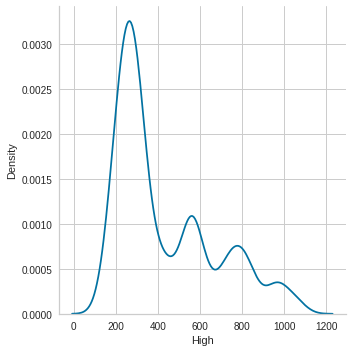

In [ ]:
sns.displot(df, x = 'High', kind = 'kde')

## Data Transformation

In [ ]:
df = df.sort_values(by = ['Date'])
df = df.drop(['Name'], axis = 1)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

df = df.asfreq('D')
df = df.fillna(method = 'bfill')

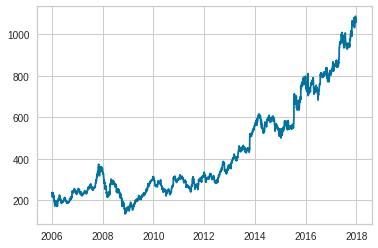

In [ ]:
plt.plot(df.index, df.High)
plt.show()

In [ ]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450.0
2006-01-04,222.17,224.70,220.09,222.84,15292353.0
2006-01-05,223.22,226.00,220.97,225.85,10815661.0
2006-01-06,228.66,235.49,226.85,233.06,17759521.0
2006-01-07,233.44,236.94,230.70,233.68,12795837.0
2006-01-08,233.44,236.94,230.70,233.68,12795837.0
2006-01-09,233.44,236.94,230.70,233.68,12795837.0
2006-01-10,232.44,235.36,231.25,235.11,9104719.0
2006-01-11,235.87,237.79,234.82,236.05,9008664.0


In [ ]:
exp = TSForecastingExperiment()
exp.setup(data = df, \
          fh = 60, \
          target = 'High', \
          numeric_imputation_target = 'bfill', \
          numeric_imputation_exogenous = 'bfill', \
          scale_target = 'minmax', \
          scale_exogenous = 'minmax', \
          )

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: 837d
INFO:logs:self.variable_keys: {'strictly_positive', 'memory', '_all_models', 'exogenous_present', 'X_train_transformed', 'all_sp_values', 'X_test', 'USI', 'primary_sp_to_use', 'gpu_param', 'display_container', 'pipeline', '_available_plots', 'experiment__', 'master_model_container', 'index_type', 'data', 'y', 'fold_generator', 'exp_name_log', 'y_train', 'seed', 'log_plots_param', 'idx', 'fold_param', 'enforce_pi', 'y_train_transformed', 'seasonality_present', 'X_train', 'X_test_transformed', 'X', 'seasonal_period', 'logging_param', 'y_transformed', 'html_param', 'variable_keys', '_all_models_internal', 'y_test', 'fold_groups_param_full', 'n_jobs_param', '_ml_usecase', '_gpu_n_jobs_param', 'exp_id', '_all_metrics', 'X_transformed', 'fh', 'y_test_transformed', 'enforce_exogenous', 'app

,Description,Value
0,session_id,5595
1,Target,High
2,Approach,Univariate
3,Exogenous Variables,Present
4,Data shape,"(4379, 5)"
5,Train data shape,"(4319, 5)"
6,Test data shape,"(60, 5)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 6.69s...............


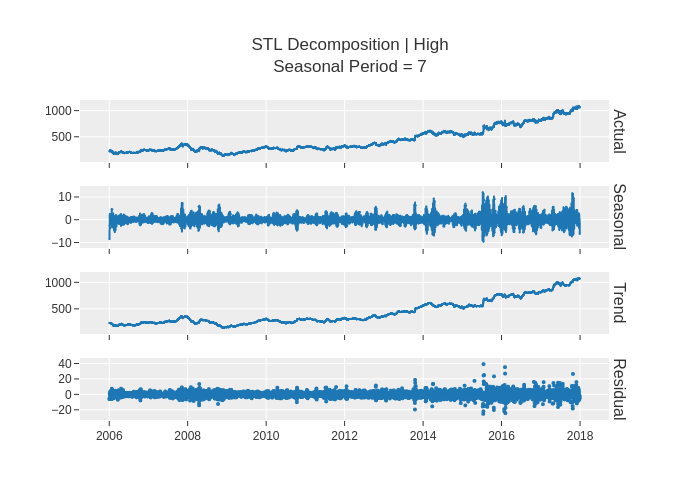

INFO:logs:Visual Rendered Successfully


In [ ]:
exp.plot_model(plot = 'decomp_stl')

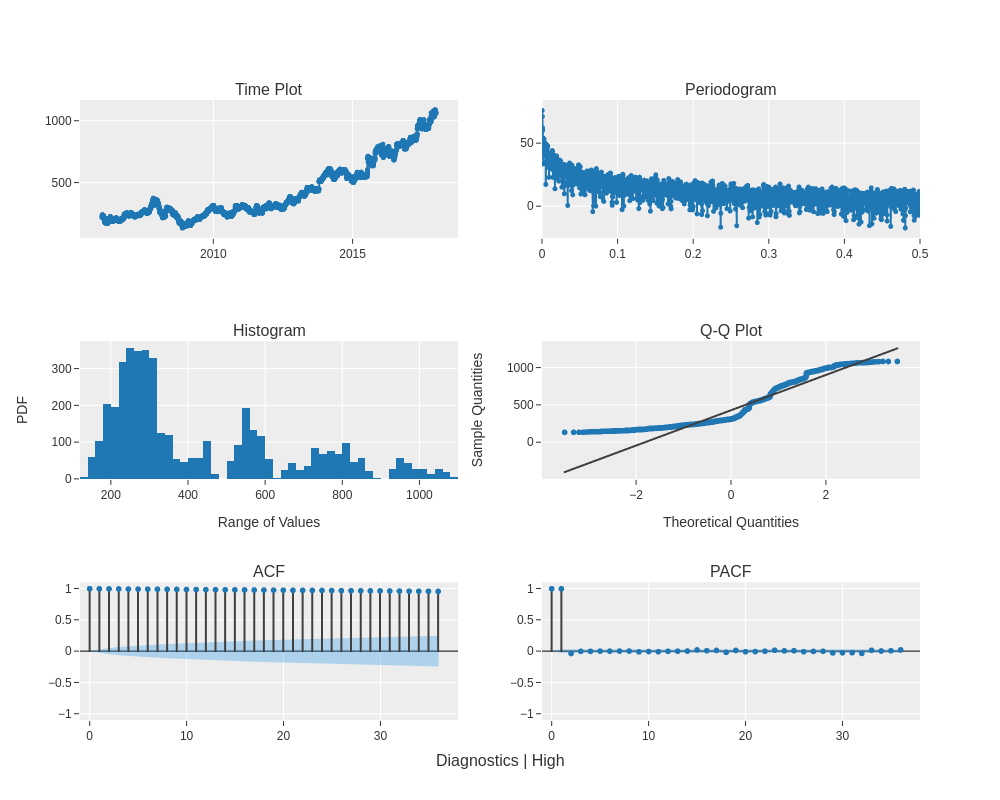

INFO:logs:Visual Rendered Successfully


In [ ]:
 exp.plot_model(plot = 'diagnostics', fig_kwargs = {'height': 800, 'width': 1000}) 

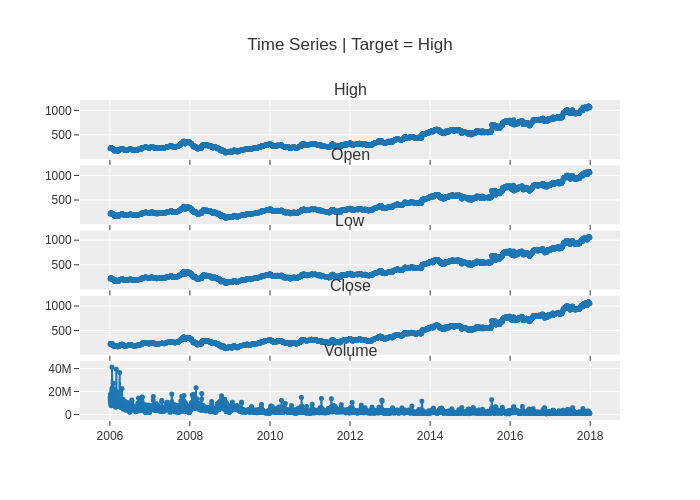

INFO:logs:Visual Rendered Successfully


In [ ]:
exp.plot_model()

## Model creation

In [ ]:
exp.models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
prophet,Prophet,pycaret.containers.models.time_series.ProphetP...,False
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,pycaret.containers.models.time_series.BaseCdsD...,True
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,pycaret.containers.models.time_series.BaseCdsD...,True


In [ ]:
arima = exp.create_model('arima', order = (0,1,0), seasonal_order = (0,1,0,7))

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2017-05-03,33.1970,37.2586,0.0340,0.0333,3.2484,2.5473,-2.7663
1,2017-07-02,31.2688,35.5389,0.0329,0.0336,3.0224,2.3962,-1.7383
2,2017-08-31,4.4456,5.6745,0.0045,0.0045,0.4250,0.3791,0.9690
Mean,NaT,22.9705,26.1573,0.0238,0.0238,2.2319,1.7742,-1.1785
SD,NaT,13.1227,14.5006,0.0136,0.0136,1.2810,0.9884,1.5755


INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:ARIMA(order=(0, 1, 0), seasonal_order=(0, 1, 0, 7))
INFO:logs:create_model() successfully completed......................................


In [ ]:
prophet = exp.create_model('prophet')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2017-05-03,2.1361,2.7060,0.0022,0.0022,0.2090,0.1850,0.9801
1,2017-07-02,1.9646,2.3612,0.0021,0.0021,0.1899,0.1592,0.9879
2,2017-08-31,2.5000,4.1323,0.0025,0.0025,0.2390,0.2761,0.9835
Mean,NaT,2.2002,3.0665,0.0023,0.0023,0.2126,0.2068,0.9839
SD,NaT,0.2232,0.7667,0.0002,0.0002,0.0202,0.0501,0.0032


INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:ProphetPeriodPatched()
INFO:logs:create_model() successfully completed......................................


In [ ]:
gbr_cds_dt = exp.create_model('gbr_cds_dt')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2017-05-03,29.5929,33.9848,0.0300,0.0306,2.8957,2.3235,-2.1335
1,2017-07-02,16.7604,20.4650,0.0177,0.0175,1.6200,1.3798,0.0920
2,2017-08-31,11.6727,14.7640,0.0119,0.0118,1.1160,0.9864,0.7899
Mean,NaT,19.3420,23.0712,0.0199,0.0200,1.8773,1.5633,-0.4172
SD,NaT,7.5402,8.0604,0.0076,0.0079,0.7490,0.5611,1.2466


INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:BaseCdsDtForecaster(regressor=GradientBoostingRegressor(random_state=5595),
                    sp=7, window_length=7)
INFO:logs:create_model() successfully completed......................................


## Prediction on test set


INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,ARIMA,6.9198,10.1821,0.0066,0.0065,0.6573,0.6771,0.5241


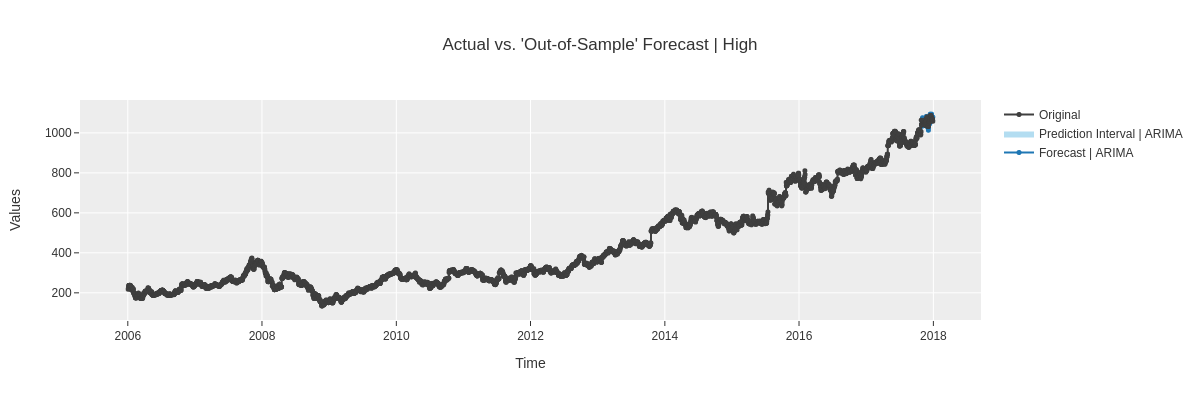

INFO:logs:Visual Rendered Successfully


In [ ]:
exp.predict_model(arima)
exp.plot_model(estimator = arima, fig_kwargs = {'height': 400, 'width': 1200})

INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,Prophet,2.5578,3.3913,0.0024,0.0024,0.243,0.2255,0.9472


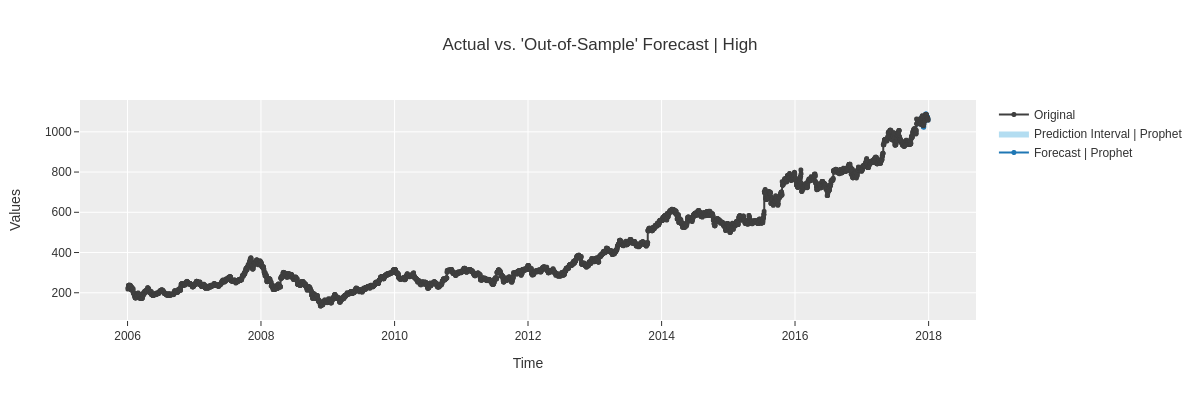

INFO:logs:Visual Rendered Successfully


In [ ]:
exp.predict_model(prophet)
exp.plot_model(estimator = prophet, fig_kwargs = {'height': 400, 'width': 1200})

In [ ]:
exp.predict_model(gbr_cds_dt)

INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,GradientBoostingRegressor,38.1002,40.7303,0.0359,0.0366,3.6191,2.7086,-6.6146


,y_pred
2017-10-31,1036.2984
2017-11-01,1032.6298
2017-11-02,1029.6865
2017-11-03,1023.4202
2017-11-04,1015.4541
2017-11-05,1014.3586
2017-11-06,1013.7977
2017-11-07,1015.2330
2017-11-08,1015.4603
2017-11-09,1014.8041
